<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

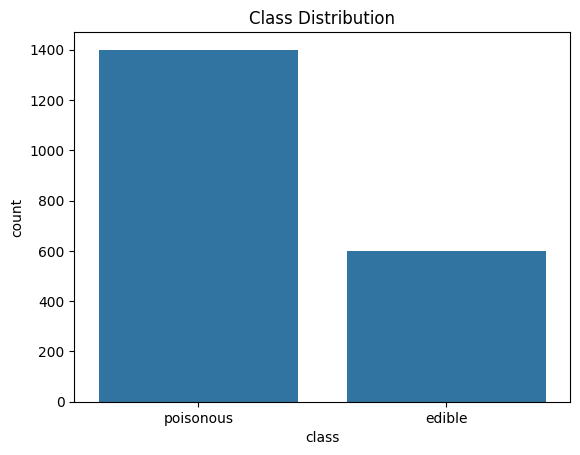

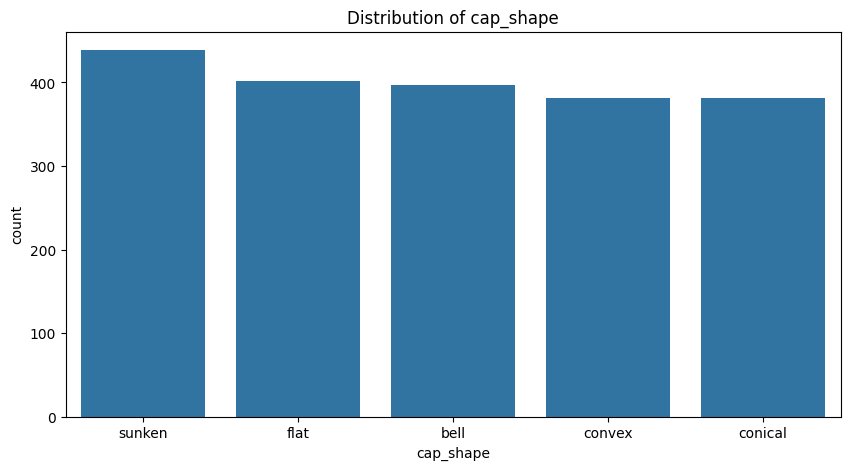

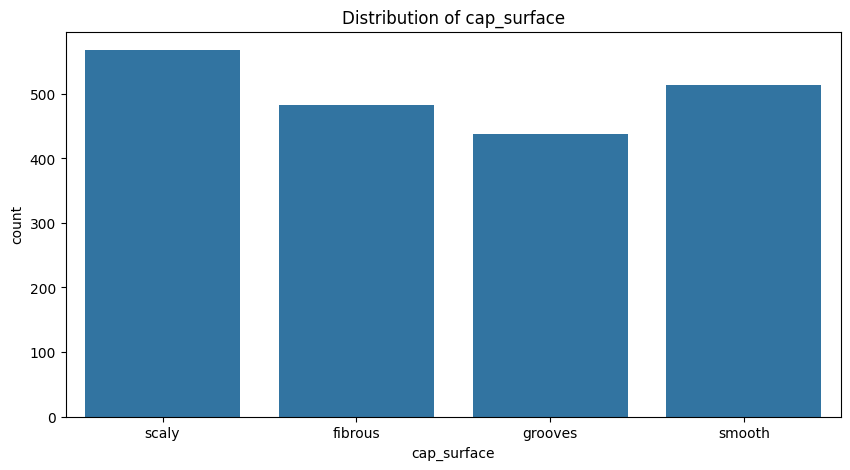

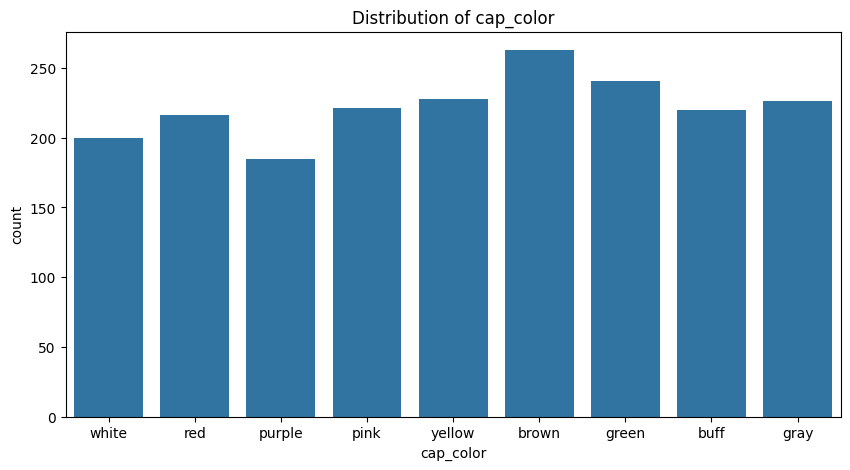

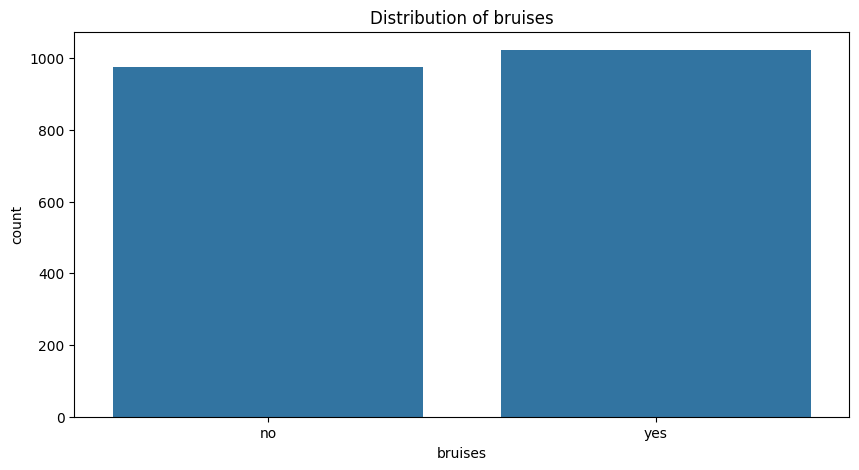

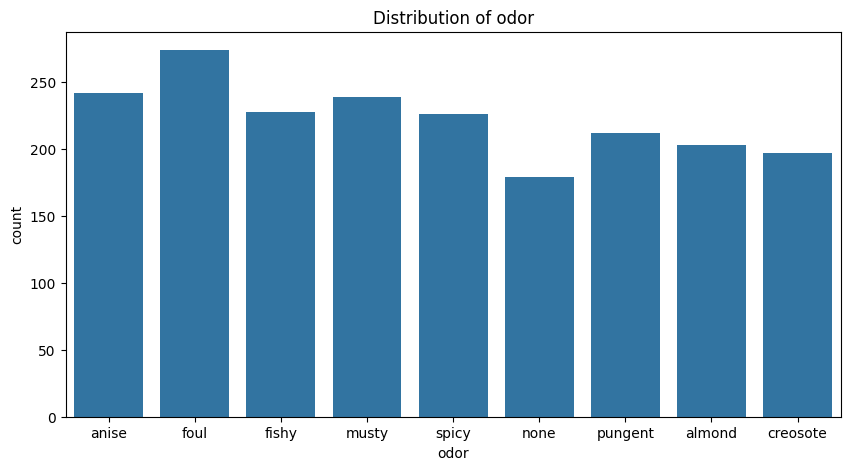

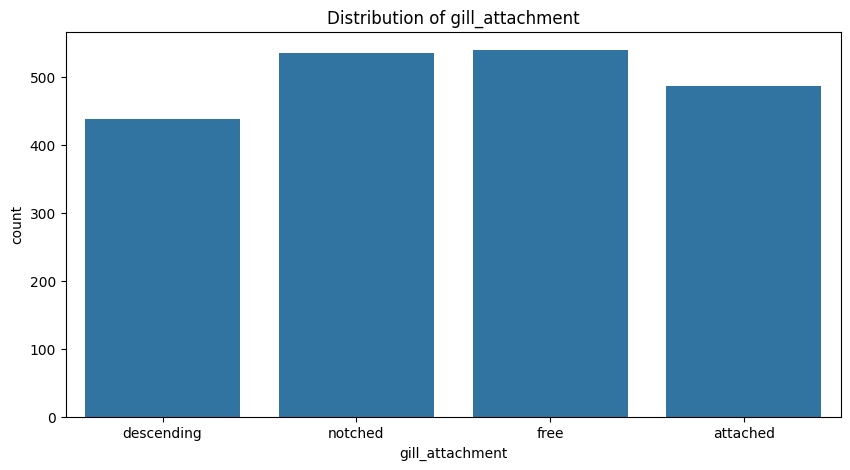

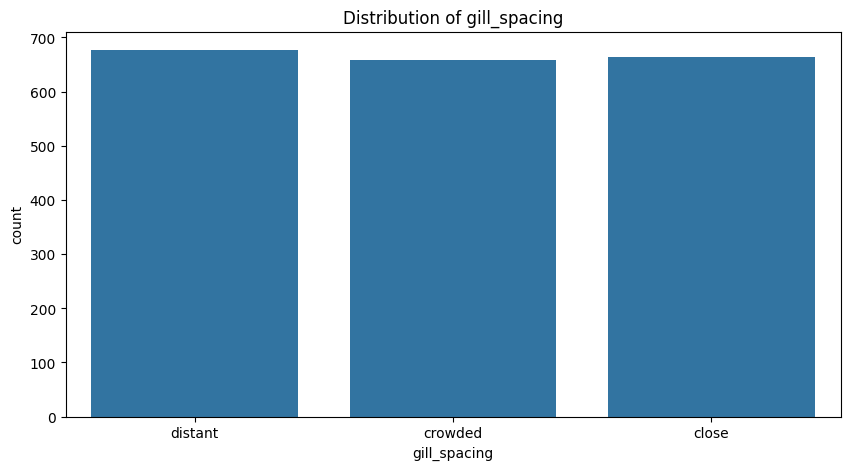

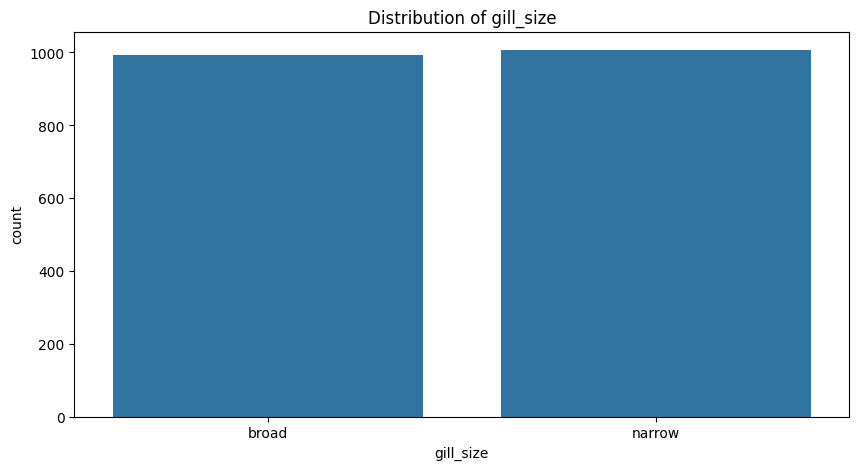

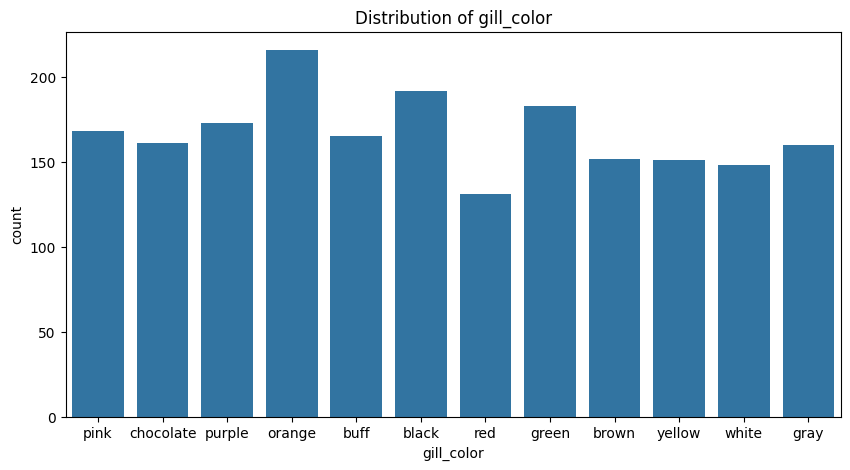

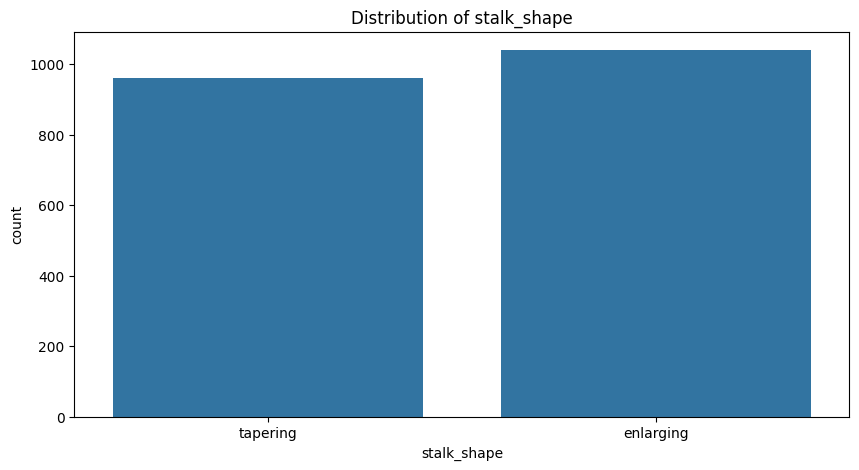

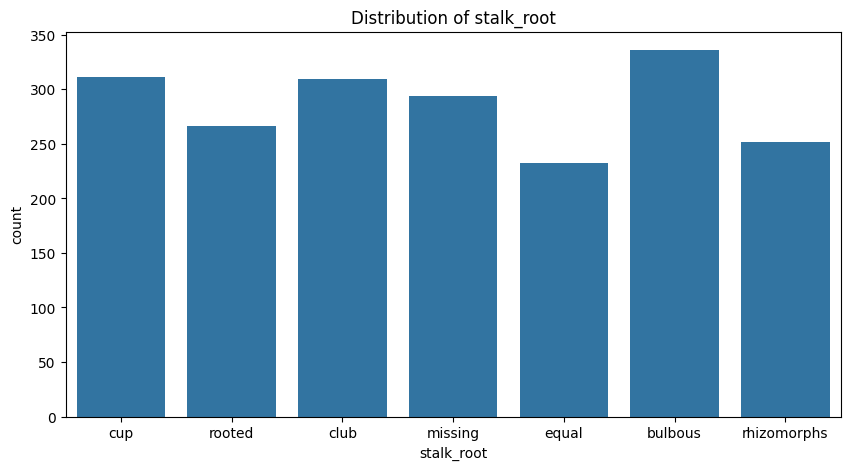

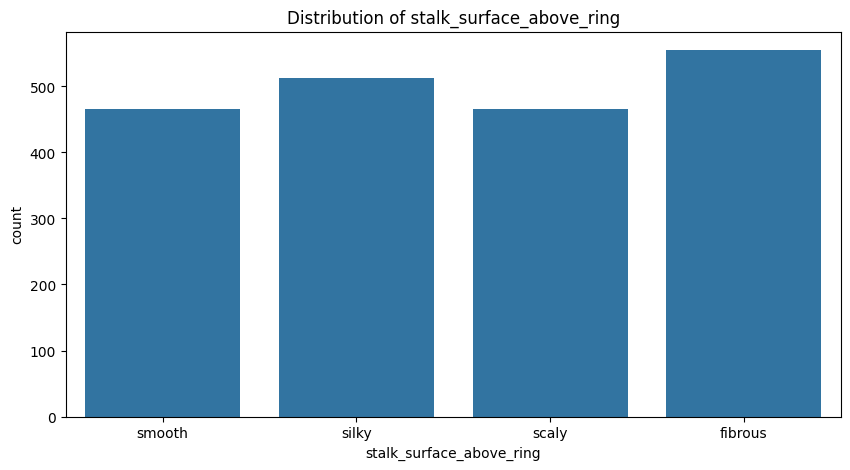

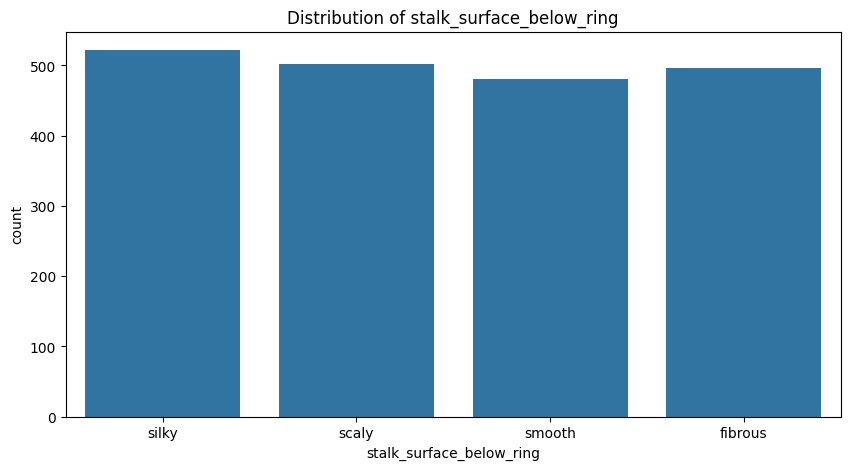

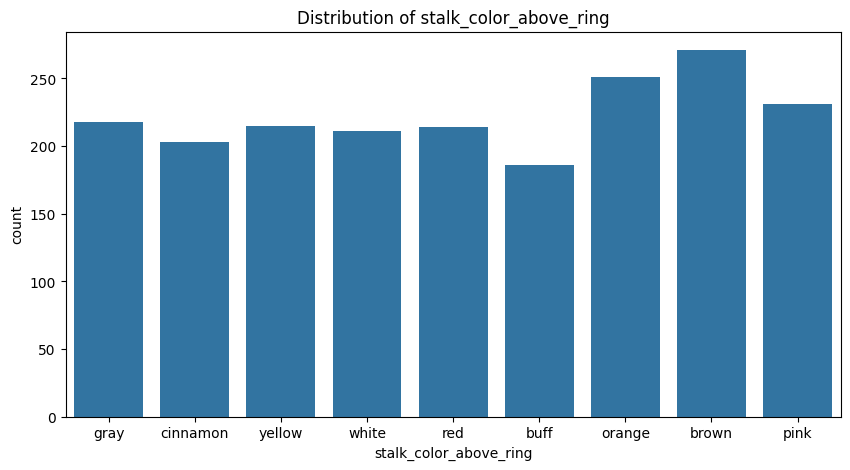

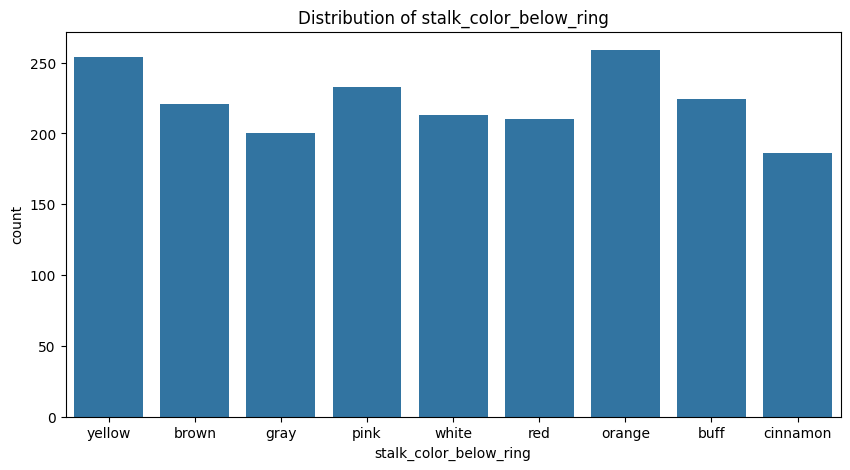

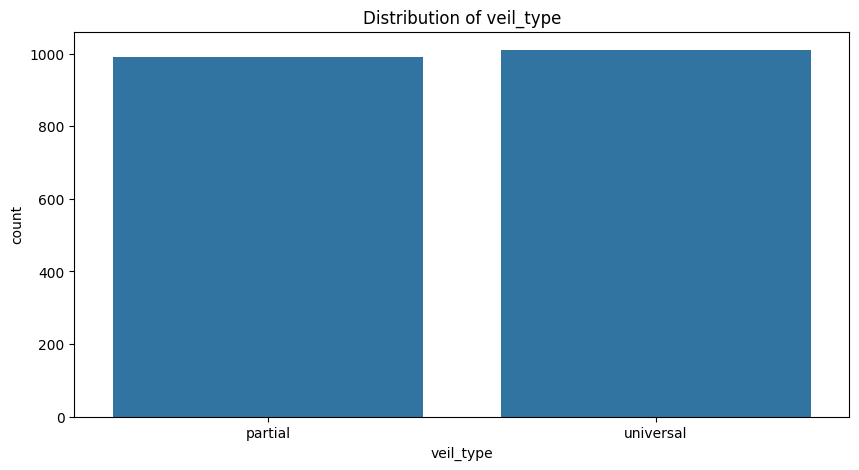

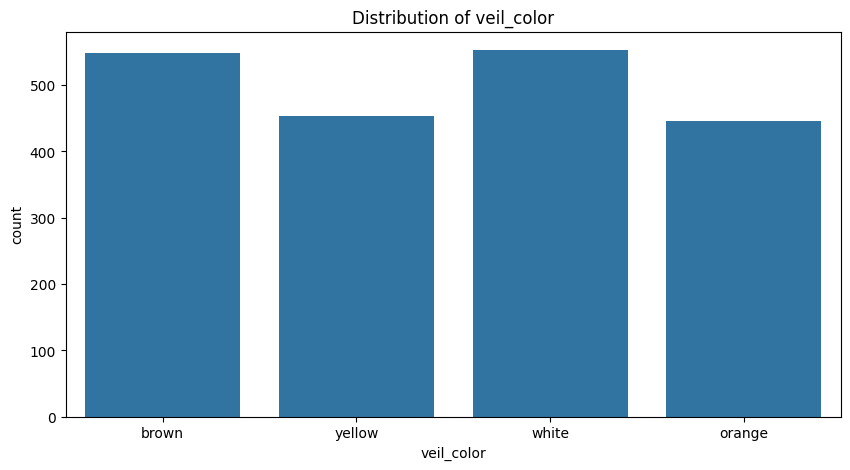

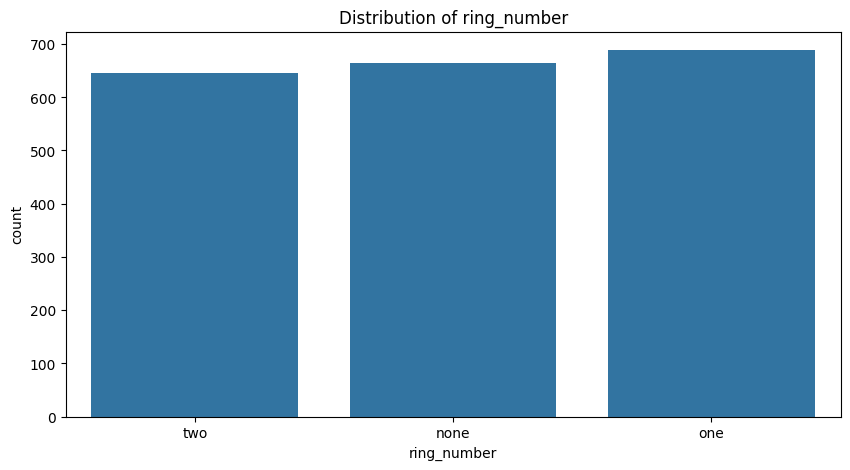

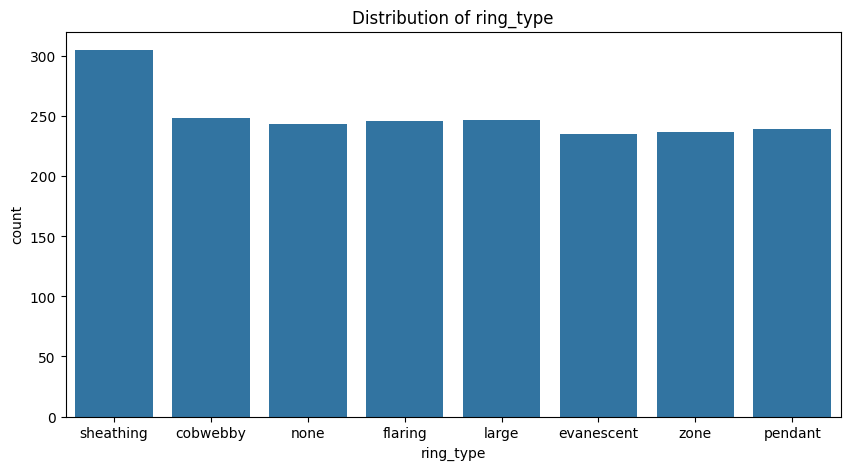

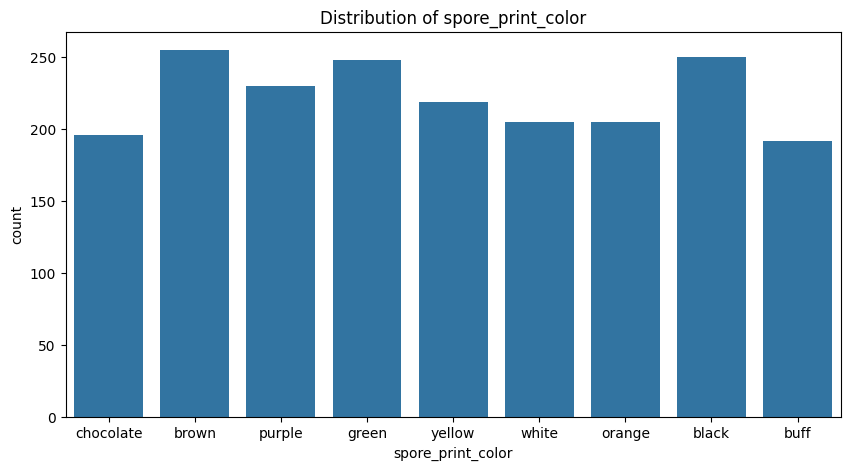

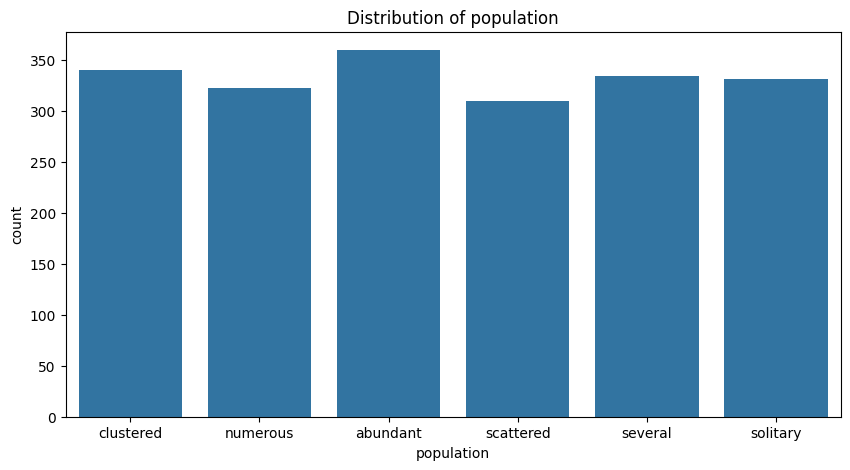

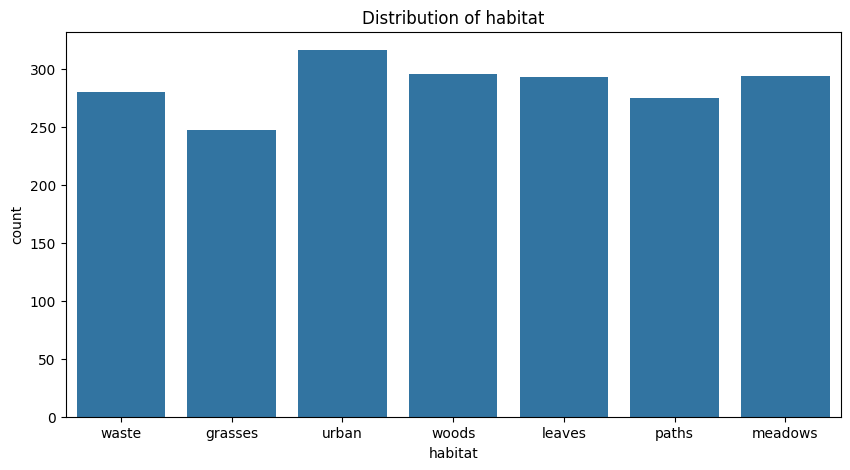

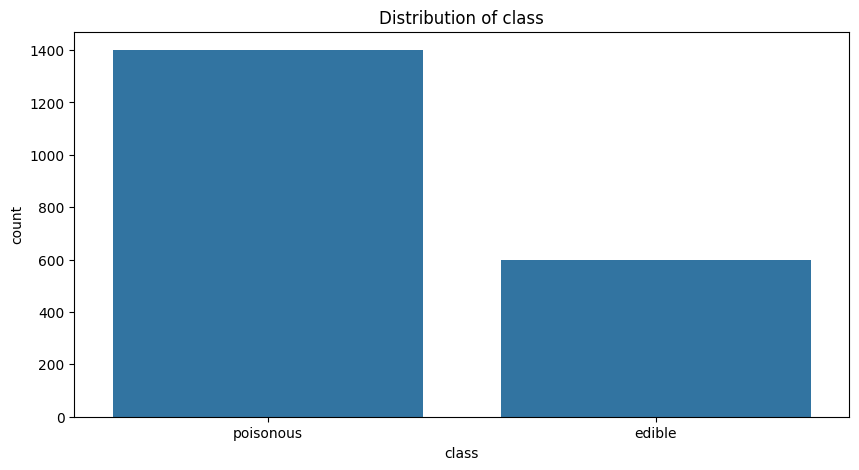

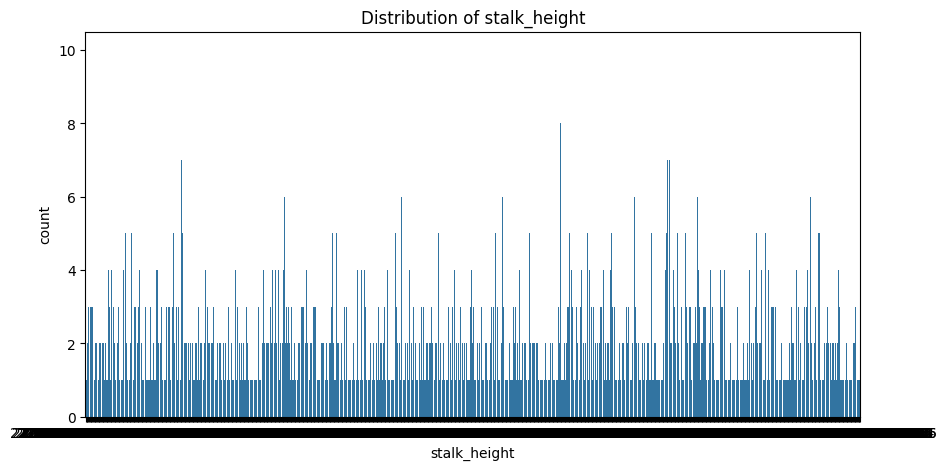

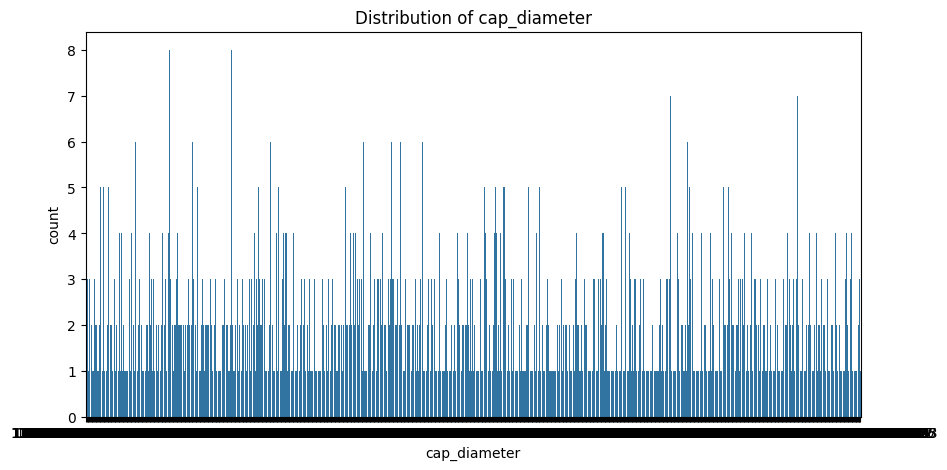

In [1]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Mushroom dataset
file_path = r"D:\DS\SVM\mushroom.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable (class)
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# Visualize the distribution of features
for column in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()


In [2]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (1600, 25)
Testing set size: (400, 25)


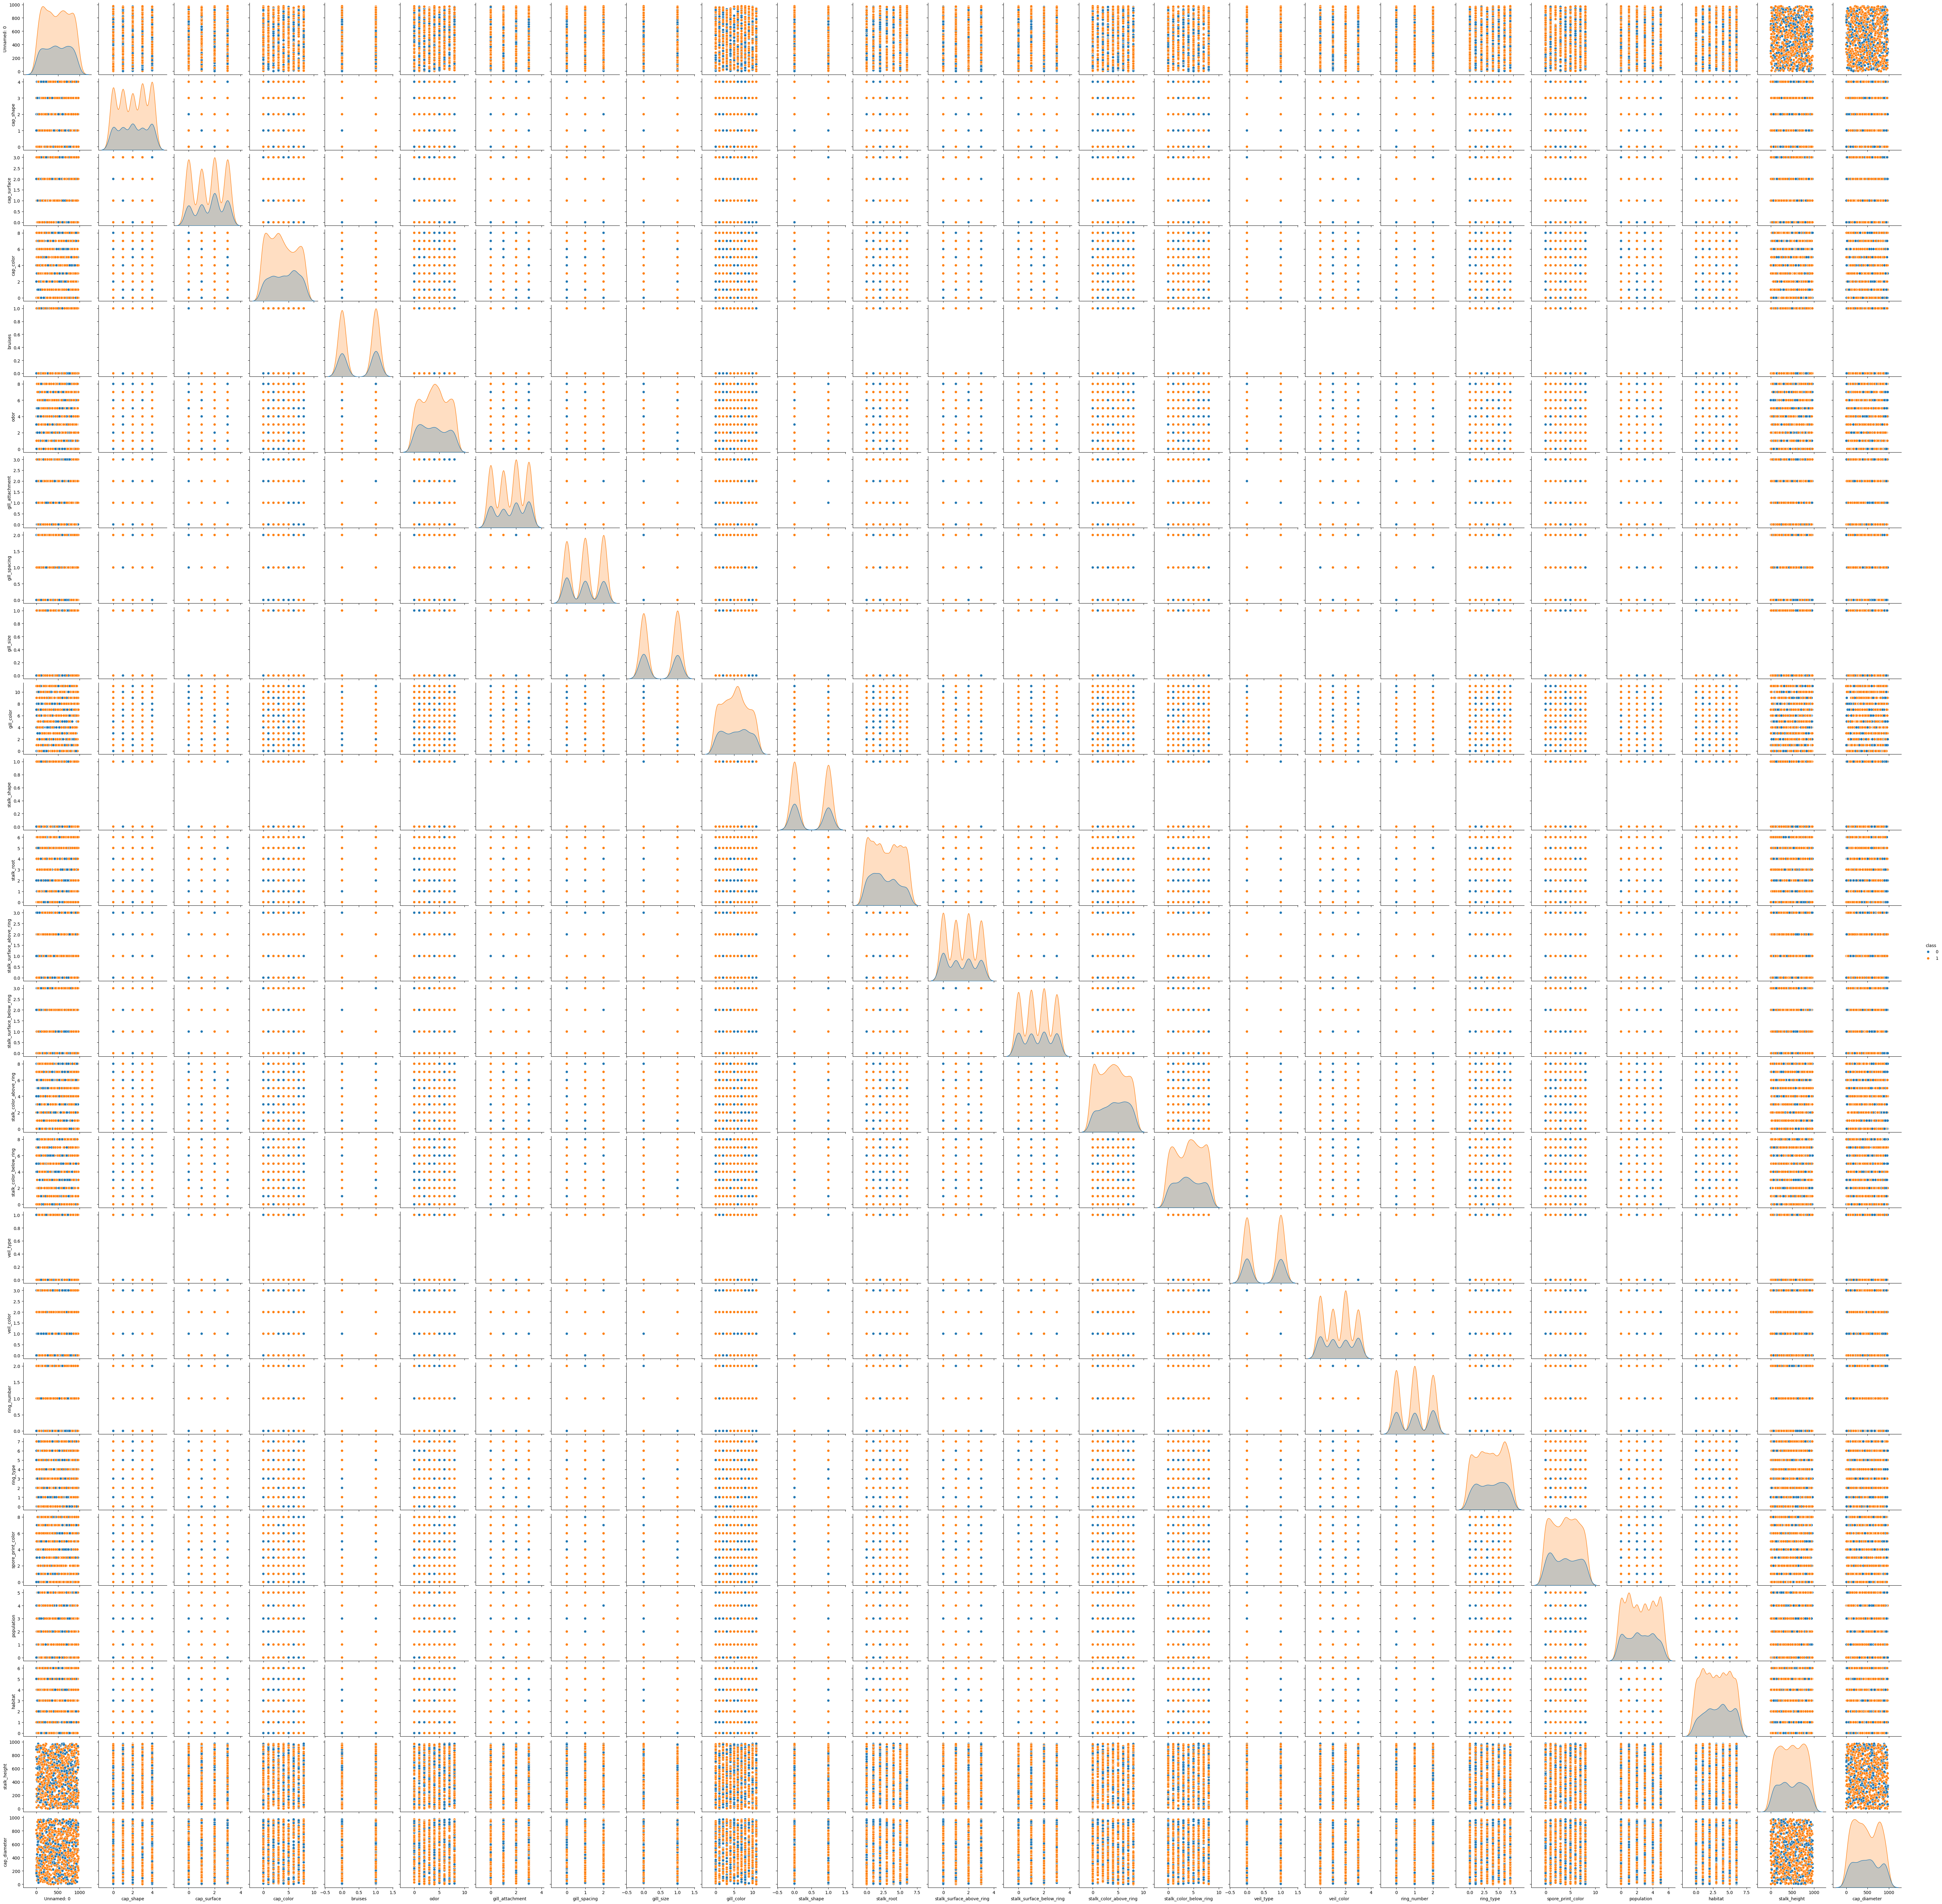

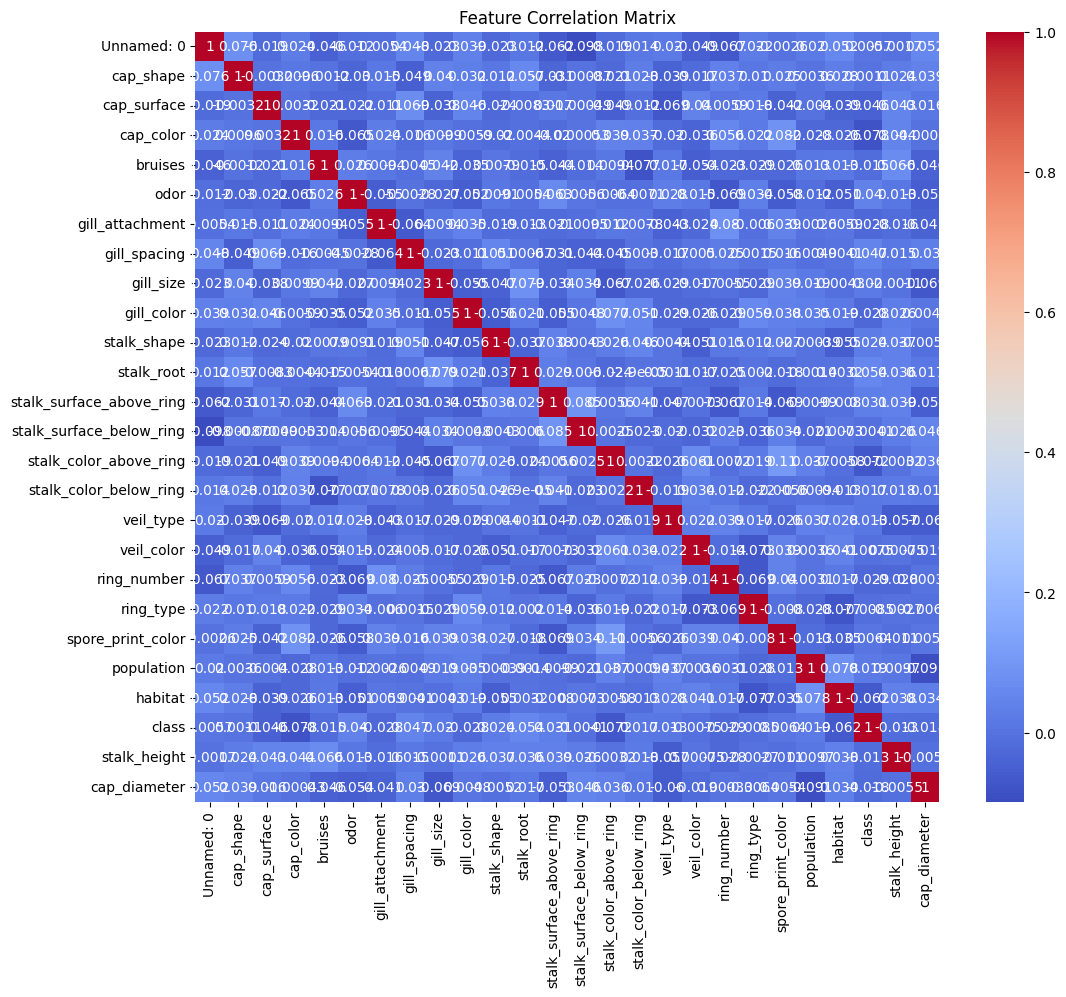

In [3]:
#Data Visulaization 
# Pair plot to visualize feature distributions and relationships
sns.pairplot(df, hue='class')
plt.show()

# Heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

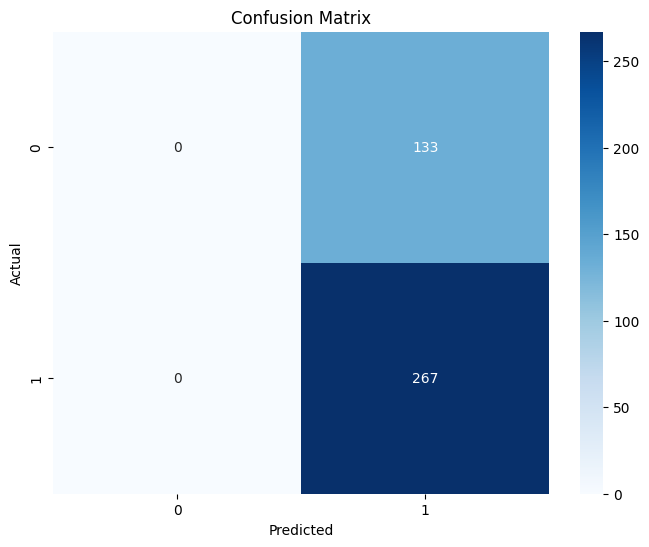

In [4]:
#SVM Implementation 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Implement a basic SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate model performance
y_pred = svm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


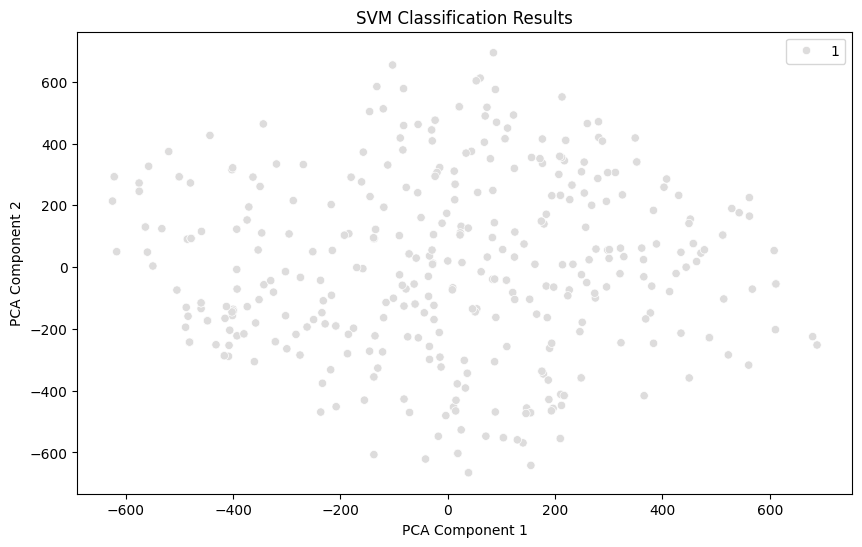

In [5]:
#Visulaization of SVM Results
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Visualize classification results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm')
plt.title('SVM Classification Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
#Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print best parameters and best score
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

# Evaluate best model on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f'Optimized Accuracy: {accuracy_score(y_test, y_pred_best)}')
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.8s


In [ ]:
#Comparison and Analysis
# Comparison of different kernel performances
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred_kernel)}')
    print(classification_report(y_test, y_pred_kernel))
    print('-' * 60)

# Discuss practical implications
print('SVMs are powerful classifiers, especially for datasets with complex boundaries. The Mushroom dataset, with its categorical features, shows that SVMs can effectively handle such data when properly encoded and tuned. Different kernels offer flexibility, but the radial basis function (RBF) often performs best in practice.')
